## Imports

In [6]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import simpledialog
print(matplotlib.matplotlib_fname())

C:\Users\andre\.matplotlib\matplotlibrc


## Save Figures Flag

In [4]:
SAVE_FIG = False

## Get Data Paths

In [19]:
ROOT = tk.Tk()
ROOT.withdraw()
title = "File Location"
prompt = "Enter the path to the evaluation data: "
# Get path from user
path = simpledialog.askstring(title, prompt)
# If user closes program
if path is None:
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# If user enters non-existant path
save_path = Path(path)
if not os.path.exists(save_path):
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# Set the paths according to how they should be saved
data_path = save_path / "plotting_data"
save_path = save_path / "figures"
# Make the save path if it does not exits
if not os.path.exists(save_path): os.makedirs(save_path)
# If the models path does not exist or is named wrong
if not os.path.exists(data_path):
    raise Exception("Plotting Data path does not exist or name of models file is not 'models'.")
    sys.exit()
# Print what the models path defined and the save path defined
print(f"\nThe data will be queued from:\n {data_path}\n")
print(f"The figures will be saved to:\n {save_path}")


The data will be queued from:
 Training_Data\2021_08_23\plotting_data

The figures will be saved to:
 Training_Data\2021_08_23\figures


## Import the Data from Path

In [23]:
# sort the files read in
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

files = sorted(glob.glob(str(data_path / '*.csv')), key=numericalSort)

print(f'Number of Agents found: {len(files)}\n')

# organize the data into dictionaries
data = {}                                                                                   # dict to store agent data
file_names = []                                                                             # list to store file names for naming agents in dict
for f in files:
    file_name = os.path.basename(f)                                                         # get file name and split it up by
    file_name = re.split('[_ .]', file_name)
    # uncomment print statment to determine what numbers are needed in file_name
    print(file_name)
    file_name = f"{file_name[0]}-{file_name[1]}"                                                 # choose the parts of file name you want to keep using the previous print statment
    file_names.append(file_name)                                                            # add the agents name to the list of file names
    df = pandas.read_csv(f)                                                                 # read in the first .csv file
    df_columns = list(df)                                                                   # get the list of data column names
    for column in df_columns:                                                               
        df_columns[df_columns.index(column)] = column.replace(' ', '').replace('#', '')     # get rid of spaces and #'s in the column names
    df.columns = df_columns                                                                 # set the .csv file column names to the cleaned up names
    data[file_name] = df.to_dict('series')                                                  # turn the .csv into a dict and place it in the data dict

    for column in data[file_name]:
            data[file_name][column] = data[file_name][column].to_numpy()                    # convert the columns in the agent dict in the data dict to numpy arrays
print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting
print(f"""\nAgent's Data Key Names: {list(data[next(iter(data))])}\n""")                       # print out the data column names for using later in plotting

# deleted = 0
# for agent in list(data):
#     if np.max(data[agent]['RodPos']) <= 0.05:
#         del data[agent]
#         print(f'{agent} never gets off the ground, deleting it.')
#         deleted = deleted + 1
# print(f'\nNumber of agents deleted: {deleted}. Number of agents remaining: {len(list(data))}')
# print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting

Number of Agents found: 24

['16', '100000', '08232021', '192330', 'csv']
['16', '200000', '08232021', '192333', 'csv']
['16', '300000', '08232021', '192335', 'csv']
['16', '400000', '08232021', '192338', 'csv']
['104', '100000', '08232021', '192319', 'csv']
['104', '200000', '08232021', '192322', 'csv']
['104', '300000', '08232021', '192325', 'csv']
['104', '400000', '08232021', '192328', 'csv']
['676', '100000', '08232021', '192340', 'csv']
['676', '200000', '08232021', '192343', 'csv']
['676', '300000', '08232021', '192346', 'csv']
['676', '400000', '08232021', '192348', 'csv']
['767', '100000', '08232021', '192351', 'csv']
['767', '200000', '08232021', '192353', 'csv']
['767', '300000', '08232021', '192356', 'csv']
['767', '400000', '08232021', '192358', 'csv']
['878', '100000', '08232021', '192401', 'csv']
['878', '200000', '08232021', '192403', 'csv']
['878', '300000', '08232021', '192406', 'csv']
['878', '400000', '08232021', '192409', 'csv']
['947', '100000', '08232021', '19241

## Reward Vs Agent  

<ipython-input-31-040f14ed4313>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=0.5)


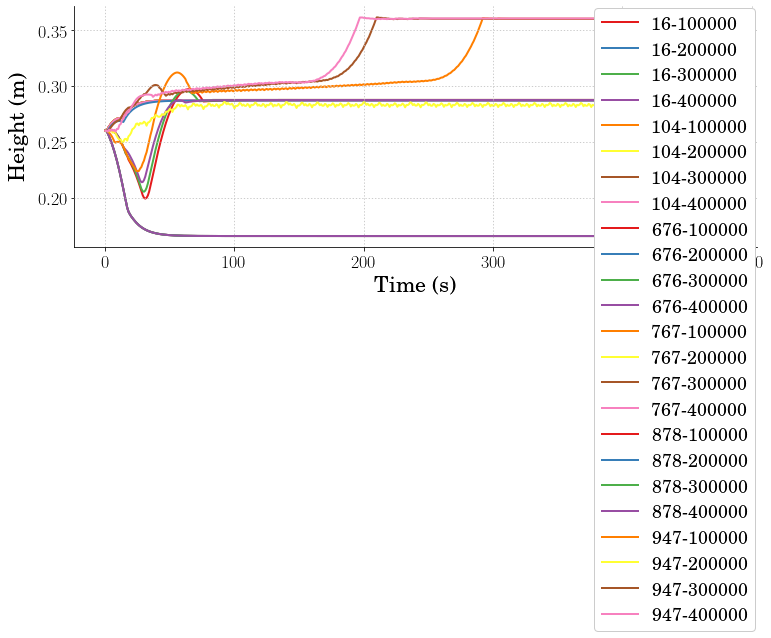

In [31]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(12,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["Reward"], linewidth=2, linestyle='-', label=agent)

# uncomment below and set limits if needed
# plt.xlim(0,4)
# plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'RewardVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()